# Importações

In [452]:
import pandas as pd
import numpy as np

In [453]:
# Database
perguntas = pd.read_csv("stackoverflow_perguntas.csv")

# Mostra as primeiras linhas
perguntas.head()

,Perguntas,Tags
0,Possuo um projeto Node.js porém preciso criar ...,node.js
1,"Gostaria de fazer testes unitários no Node.js,...",node.js
2,Como inverter a ordem com que o jQuery itera u...,jquery
3,Eu tenho uma página onde pretendo utilizar um ...,html
4,Como exibir os dados retornados do FireStore e...,html angular


In [454]:
# Tamanho do database
perguntas.shape

(5408, 2)

In [455]:
# Todas as tags presentes no database
perguntas["Tags"].unique()

array(['node.js', 'jquery', 'html', 'html angular ', 'html ', 'angular',
       'angular ', 'jquery html  ', 'jquery ', 'jquery html',
       'jquery html ', 'html angular', 'angular node.js ', 'html  ',
       'jquery html angular', 'node.js ', 'html jquery', 'html jquery ',
       'jquery angular  ', 'html node.js', 'jquery  ', 'angular node.js',
       'jquery angular', 'html node.js ', 'jquery node.js ', 'angular  ',
       'jquery angular ', 'jquery html angular ', 'node.js html ',
       ' node.js', 'node.js html', 'html angular  ', 'jquery node.js',
       'angular html', 'html angular  node.js', 'jquery html node.js',
       'html angular node.js'], dtype=object)

In [456]:
len(perguntas["Tags"].unique())

37

In [457]:
# Criar conjunto de palavras-chave únicas sem repetição
label = set(tag for tags in perguntas["Tags"].unique() for tag in tags.split())

# Criar colunas binárias de forma eficiente
for tag in label:
    perguntas[tag] = perguntas["Tags"].str.contains(tag).astype(int)

perguntas

,Perguntas,Tags,jquery,html,node.js,angular
0,Possuo um projeto Node.js porém preciso criar ...,node.js,0,0,1,0
1,"Gostaria de fazer testes unitários no Node.js,...",node.js,0,0,1,0
2,Como inverter a ordem com que o jQuery itera u...,jquery,1,0,0,0
3,Eu tenho uma página onde pretendo utilizar um ...,html,0,1,0,0
4,Como exibir os dados retornados do FireStore e...,html angular,0,1,0,1
...,...,...,...,...,...,...
5403,Queria saber como pegar o total de cores de um...,jquery html,1,1,0,0
5404,"Boa noite, estou usando phonegap para fazer um...",html,0,1,0,0
5405,"Estou construindo um mini fórum, e nele, os us...",jquery html,1,1,0,0
5406,"Boa tarde, Estou para desenvolver um site na ...",html,0,1,0,0


# Variáveis

In [458]:
# Explicativas
x = perguntas["Perguntas"]

x

0       Possuo um projeto Node.js porém preciso criar ...
1       Gostaria de fazer testes unitários no Node.js,...
2       Como inverter a ordem com que o jQuery itera u...
3       Eu tenho uma página onde pretendo utilizar um ...
4       Como exibir os dados retornados do FireStore e...
                              ...                        
5403    Queria saber como pegar o total de cores de um...
5404    Boa noite, estou usando phonegap para fazer um...
5405    Estou construindo um mini fórum, e nele, os us...
5406    Boa tarde,  Estou para desenvolver um site na ...
5407    Estou fazendo um hotsite, ele é one page, e é ...
Name: Perguntas, Length: 5408, dtype: object

In [459]:
# Alvo
y = perguntas[["html", "angular", "node.js", "jquery"]]

y

,html,angular,node.js,jquery
0,0,0,1,0
1,0,0,1,0
2,0,0,0,1
3,1,0,0,0
4,1,1,0,0
...,...,...,...,...
5403,1,0,0,1
5404,1,0,0,0
5405,1,0,0,1
5406,1,0,0,0


# TF-IDF

In [460]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Transformando texto para linguagem de máquina com TF-IDF
vetorizar = TfidfVectorizer(max_features=5000, max_df=0.85)

# Transformação
x = vetorizar.fit_transform(x)

print(x)

  (0, 3119)	0.17088179301467743
  (0, 4690)	0.052852557020622026
  (0, 1665)	0.05629743140037712
  (0, 2594)	0.07961405784307064
  (0, 992)	0.05505241396867048
  (0, 4101)	0.10553087972316227
  (0, 1300)	0.0431899564492856
  (0, 2252)	0.08970417295507817
  (0, 2271)	0.24190494870905596
  (0, 3484)	0.1460180413826596
  (0, 4748)	0.11640904902781535
  (0, 925)	0.038573952368816104
  (0, 406)	0.25650039265062485
  (0, 3150)	0.16625818823262492
  (0, 3329)	0.1721476052623045
  (0, 283)	0.12030901518587758
  (0, 2006)	0.1364038319669485
  (0, 1088)	0.12384213811058829
  (0, 1875)	0.05737243274154914
  (0, 259)	0.14067530442246381
  (0, 1139)	0.20850097203246382
  (0, 325)	0.19657857670333836
  (0, 2722)	0.22520296037075987
  (0, 4948)	0.19657857670333836
  (0, 3315)	0.15377193177000917
  :	:
  (5407, 3514)	0.26899168708864485
  (5407, 3560)	0.19918528230611945
  (5407, 2586)	0.20505321169582705
  (5407, 4286)	0.13771454851005355
  (5407, 777)	0.1789632547438467
  (5407, 4579)	0.374028055723

# Lista com valores

In [461]:
y = [tuple(row) for row in y.to_numpy()]

y = np.array(y)  # Converte a lista para um array NumPy

y

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       ...,
       [1, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 1]])

# Teste e treino

In [462]:
from sklearn.model_selection import train_test_split

# treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=0)

In [463]:
print(X_treino)

  (0, 834)	0.14365484024033187
  (0, 2975)	0.15575198646384536
  (0, 4132)	0.41239447669356194
  (0, 1113)	0.14765978885330086
  (0, 1137)	0.43667106952519535
  (0, 780)	0.12234307451317065
  (0, 2247)	0.12808458008969922
  (0, 4111)	0.15267547571602244
  (0, 2236)	0.10356310302026804
  (0, 175)	0.28128422968307326
  (0, 3340)	0.0792684895869722
  (0, 1231)	0.09698741808266546
  (0, 2349)	0.1515487443384869
  (0, 2590)	0.10356310302026804
  (0, 1344)	0.09303027264221544
  (0, 3171)	0.08936761684533259
  (0, 2886)	0.06093814551540481
  (0, 4782)	0.12637687739921502
  (0, 4693)	0.20522510246087652
  (0, 2913)	0.12074224799456855
  (0, 4445)	0.059603421081357445
  (0, 4461)	0.13988470960999036
  (0, 2010)	0.06271133673728935
  (0, 1106)	0.2794090065990503
  (0, 2897)	0.04723427316917272
  :	:
  (4324, 4919)	0.1962896509008705
  (4324, 4848)	0.16755718344809475
  (4324, 1568)	0.054983016937224835
  (4324, 3762)	0.0870486256673611
  (4324, 966)	0.0550762972947466
  (4324, 3158)	0.0555347363

In [464]:
print(y_treino)

[[0 1 0 0]
 [0 1 0 0]
 [1 0 0 0]
 ...
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]]


In [348]:
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(y_teste, previsao)

print(f"A acurácia foi de {acuracia * 100 :.2f}%")

A acurácia foi de 61.09%


In [349]:
# Importação
from sklearn.metrics import hamming_loss

hamming = hamming_loss(y_teste, previsao)

print(f"O hamming foi de {hamming * 100 :.2f}%")

O hamming foi de 38.91%


# Modelo ClassifierChain

In [467]:
from skmultilearn.problem_transform import ClassifierChain

classificador_cadeia = ClassifierChain(regressao).fit(X_treino, y_treino)

## Previsão

In [468]:
previsao_chain = classificador_cadeia.predict(X_teste)

## Acurácia

Considera um erro quando uma linha tem apenas um erro. Não avalia os blocos binários individualmente. No caso abaixo o calculo seria 1/3

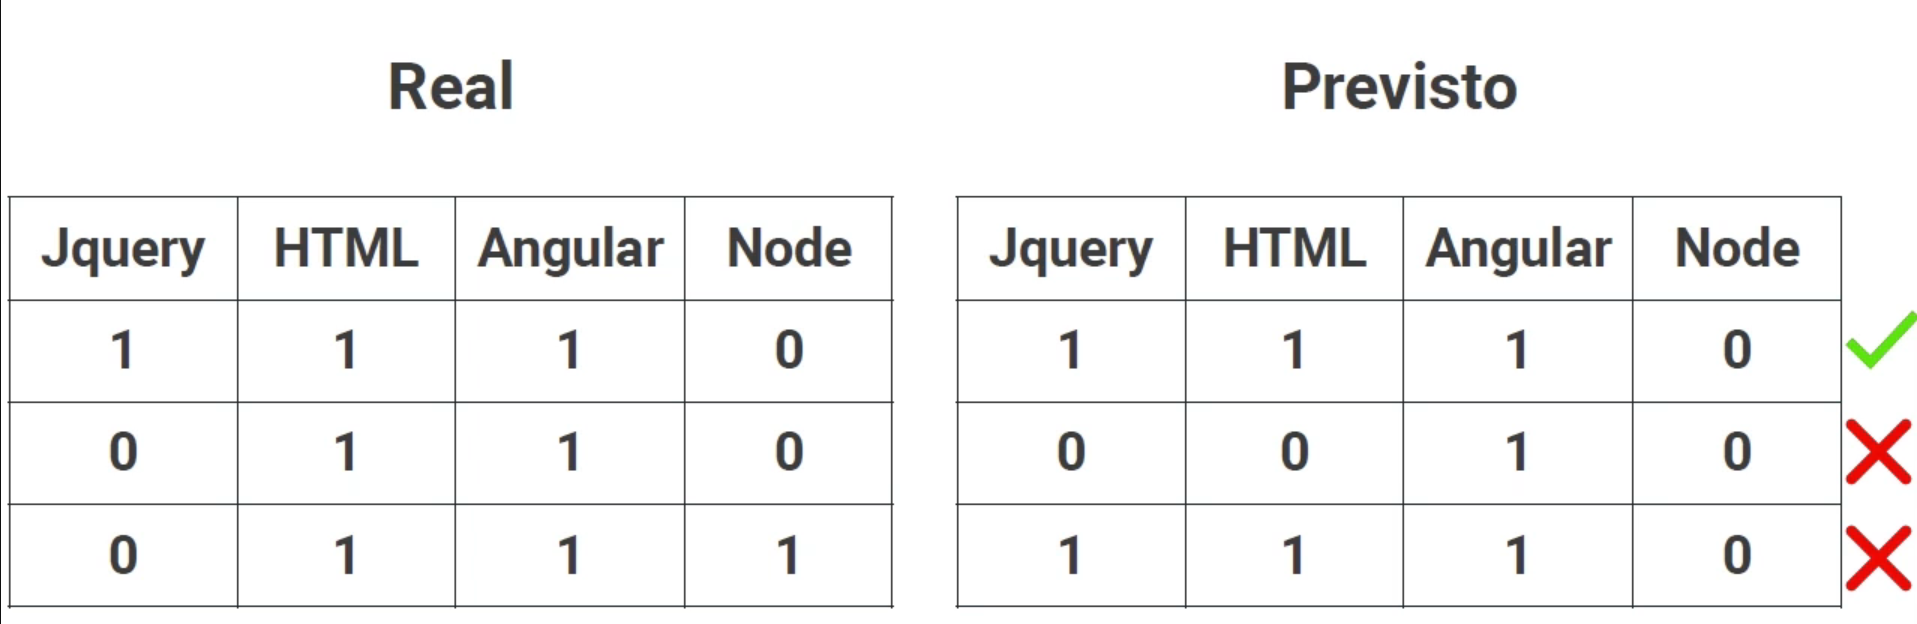

In [469]:
acuracia = accuracy_score(y_teste, previsao_chain.toarray())

print(f"A acurácia foi de {acuracia * 100 :.2f}%")

A acurácia foi de 52.31%


## Hamming Loss

Analisa os blocos individualmente e calcula a distancia entre os dados reais e previsto. No caso abaixo a conta seria 3/12.

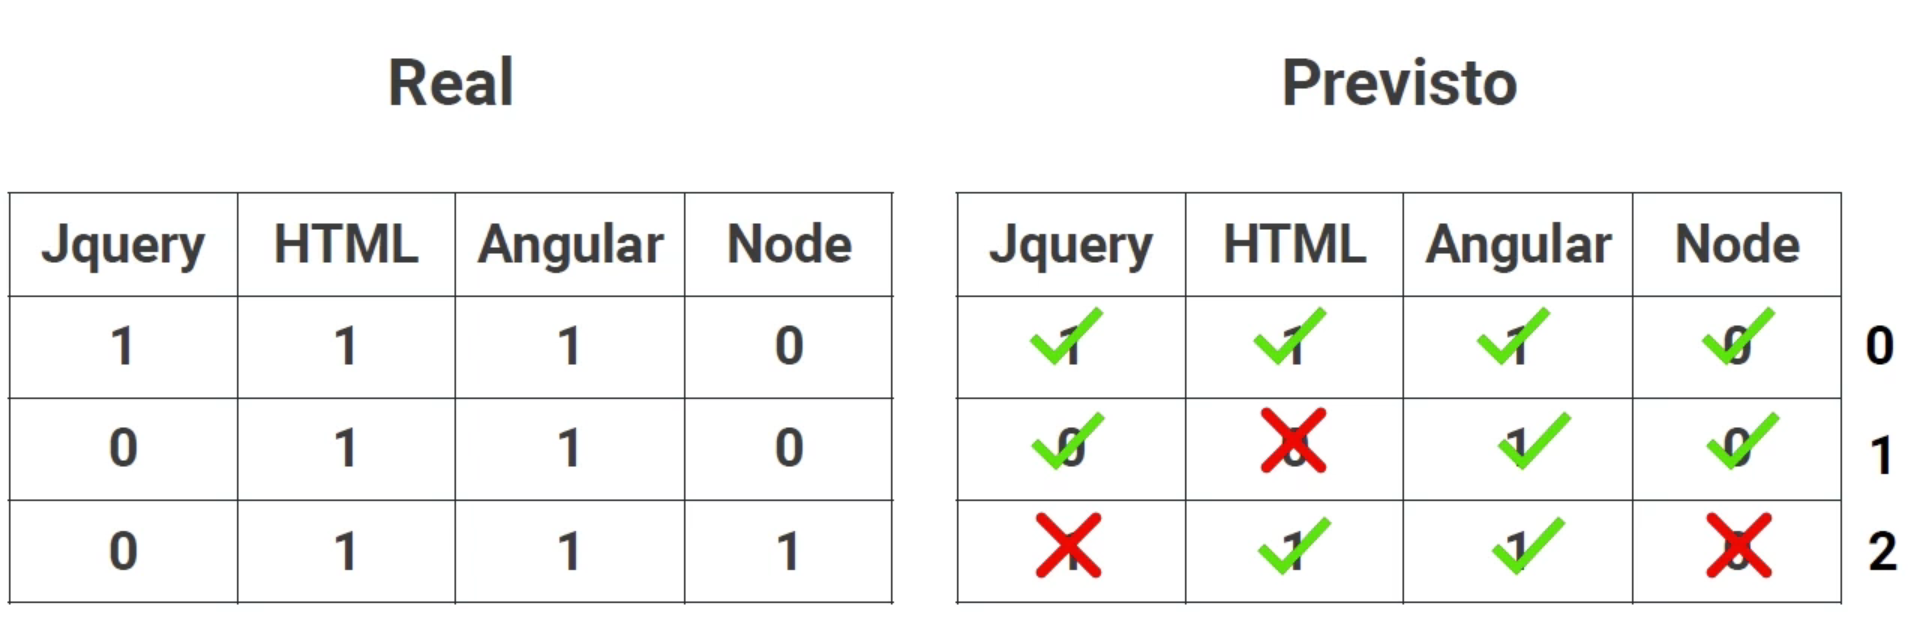

In [470]:
hamming = hamming_loss(y_teste, previsao_chain.toarray())

print(f"O hamming foi de {hamming * 100 :.2f}%")

O hamming foi de 20.36%


# Binary Relevanse

In [471]:
from skmultilearn.problem_transform import BinaryRelevance

relevancia_binaria = BinaryRelevance(regressao).fit(X_treino, y_treino)

## Previsão

In [472]:
previsao_relevance = relevancia_binaria.predict(X_teste)

## Acurácias

In [473]:
acuracia = accuracy_score(y_teste, previsao_relevance.toarray())

print(f"A acurácia foi de {acuracia * 100 :.2f}%")

A acurácia foi de 41.31%


## Hamming Loss

In [474]:
hamming = hamming_loss(y_teste, previsao_relevance.toarray())

print(f"O hamming foi de {hamming * 100 :.2f}%")

O hamming foi de 18.53%


# OneVsRestClassifier

In [475]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

modelo = OneVsRestClassifier(RandomForestClassifier()).fit(X_treino, y_treino)

## Previsão

In [476]:
previsao_oneRest = modelo.predict(X_teste)

## Acurácia

In [477]:
acuracia = accuracy_score(y_teste, previsao_oneRest)

print(f"A acurácia foi de {acuracia * 100 :.2f}%")

A acurácia foi de 46.21%


## Hamming Loss

In [478]:
hamming = hamming_loss(y_teste, previsao_oneRest)

print(f"O hamming foi de {hamming * 100 :.2f}%")

O hamming foi de 16.82%
